In [1]:
import matplotlib as mpl

In [2]:
mpl.rc('font', **{
    'size' : 12,
})
mpl.rcParams.update({
    'font.family': 'normal',
    'font.serif': [],
    'font.sans-serif': [],
    'font.monospace': [],
})
mpl.rcParams['text.usetex'] = True

In [3]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pickle
import seaborn as sns

In [4]:
sns.set_context('paper', font_scale=3.0)
sns.set_style('white')
sns.mpl.rcParams['legend.frameon'] = 'False'

## Constants

In [5]:
FILE_DATA = './fpcross_results'
FOLD_IMAG = './plot/res_'
TYPE_IMAG = 'pgf'
SAVE_IMAG = True # !!!

## Helpers

In [6]:
def load(name):
    with open(FILE_DATA, 'rb') as f:
        res = pickle.load(f)
    return res[name]

In [7]:
def show_prep(ax, with_leg=True, is_log=True):
    if with_leg:
        ax.legend(loc='best', frameon=True)
    if is_log:
        ax.semilogy()
    ax.grid(ls=":")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

In [8]:
def show(res):
    t = [i*res['h'] for i in range(1, res['m'] + 1)]

    if res['np']:
        fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
        plt.subplots_adjust(wspace=0.2)

    ax1.set_title('Relative error')
    ax1.set_xlabel('Time')
    if len(res['e_stat']):
        ax1.plot(t, res['e_stat'], label='vs stationary',
            linestyle='-', linewidth=2, color='#8b1d1d',
            marker='o', markersize=7, markerfacecolor='#8b1d1d',
            markeredgewidth=1, markeredgecolor='#8b1d1d')
    if len(res['e_real']):
        ax1.plot(t, res['e_real'], label='vs analytic',
            linestyle='-.', linewidth=2, color='#5f91ac',
            marker='o', markersize=0, markerfacecolor='#5f91ac',
            markeredgewidth=0, markeredgecolor='#5f91ac')
    show_prep(ax1)

    if res['tt']:
        ax2.set_title('TT-rank')
        ax2.set_xlabel('Time')
        ax2.plot(t, res['e_rank'],
            linestyle='-', linewidth=2, color='#8b1d1d',
            marker='o', markersize=7, markerfacecolor='#8b1d1d',
            markeredgewidth=1, markeredgecolor='#8b1d1d')
        show_prep(ax2, with_leg=False, is_log=False)

    if SAVE_IMAG:
        fpath = f'{FOLD_IMAG}{res["name"]}.{TYPE_IMAG}'
        plt.savefig(fpath, bbox_inches='tight')
        # plt.savefig(f'./res_{res["name"]}.png', bbox_inches='tight')
    plt.show()

In [9]:
def show_dum(res):
    t = [i*res['h'] for i in range(1, res['m'] + 1)]

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    plt.subplots_adjust(wspace=0.2)

    ax1.set_title('Computation results')
    ax1.set_xlabel('Time')
    ax1.plot(t, res['dum_p_list'], label='Value of $\psi$',
        linestyle='-', linewidth=2, color='#5f91ac',
        marker='o', markersize=7, markerfacecolor='#5f91ac',
        markeredgewidth=1, markeredgecolor='#5f91ac')
    ax1.plot(t, res['dum_e_list'], label='Value of $\eta$',
        linestyle='-', linewidth=2, color='#8b1d1d',
        marker='o', markersize=7, markerfacecolor='#8b1d1d',
        markeredgewidth=1, markeredgecolor='#8b1d1d')
    show_prep(ax1, is_log=False)

    ax2.set_title('TT-rank')
    ax2.set_xlabel('Time')
    ax2.plot(t, res['e_rank'],
        linestyle='-', linewidth=2, color='#8b1d1d',
        marker='o', markersize=7, markerfacecolor='#8b1d1d',
        markeredgewidth=1, markeredgecolor='#8b1d1d')
    show_prep(ax2, with_leg=False, is_log=False)

    if SAVE_IMAG:
        fpath = f'{FOLD_IMAG}{res["name"]}.{TYPE_IMAG}'
        plt.savefig(fpath, bbox_inches='tight')
        # plt.savefig(f'./res_{res["name"]}.png', bbox_inches='tight')
    plt.show()

## OUP 1D

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


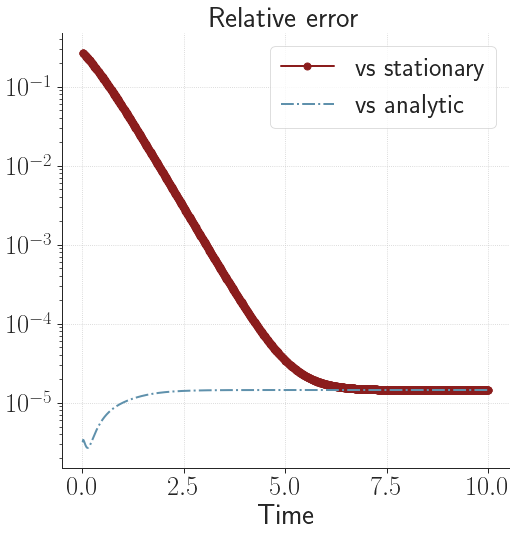

In [10]:
name = 'oup_1d_np'
res = load(name)
show(res)

## OUP 3D

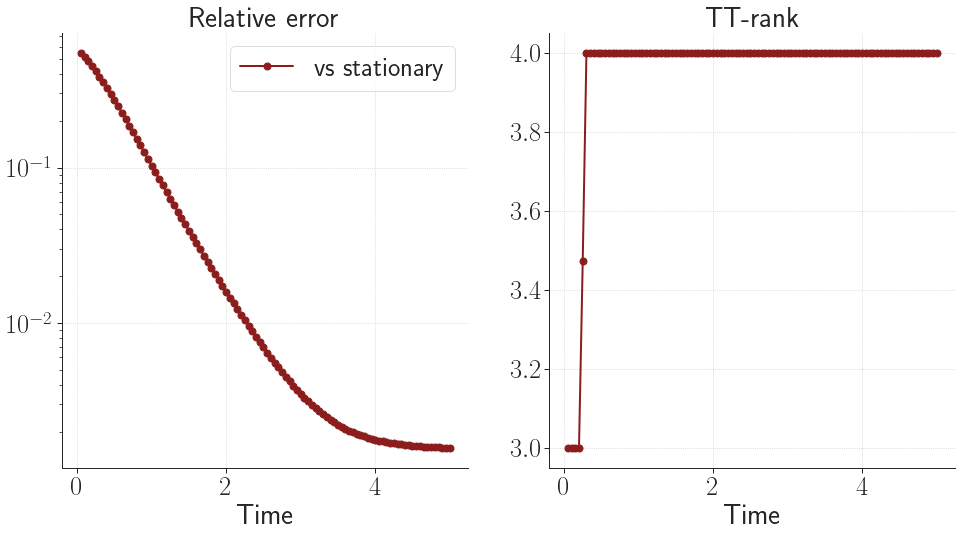

In [11]:
name = 'oup_3d_tt'
res = load(name)
show(res)

## OUP 5D

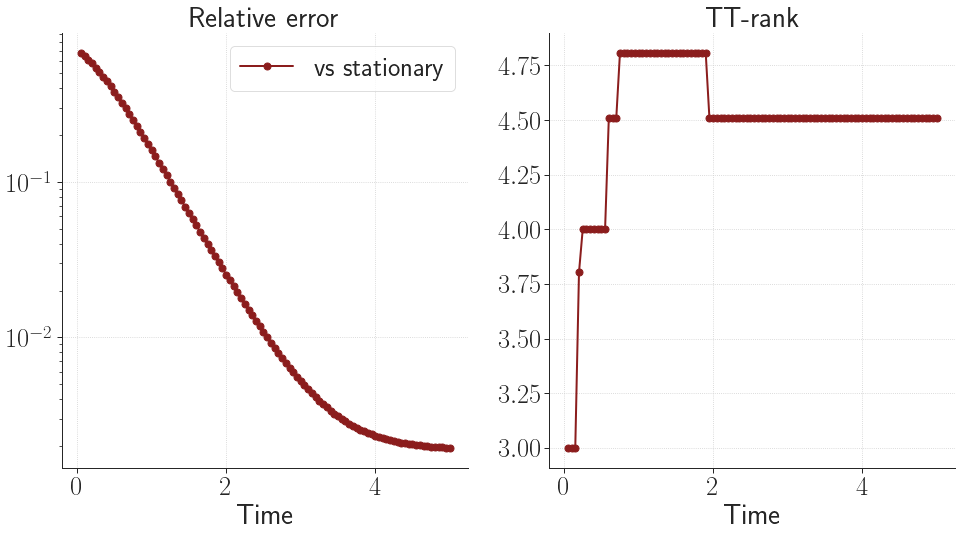

In [12]:
name = 'oup_5d_tt'
res = load(name)
show(res)

## Dum 3D

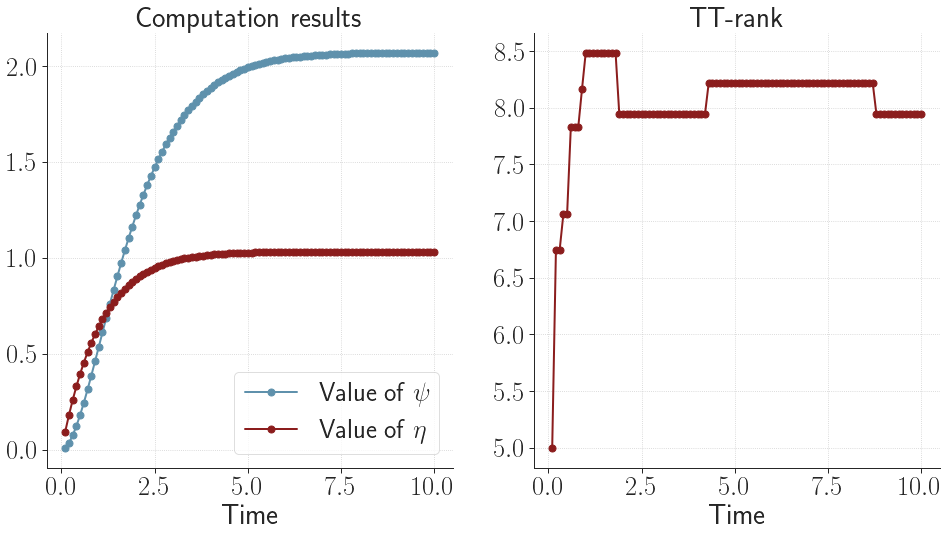

In [13]:
name = 'dum_3d_tt'
res = load(name)
show_dum(res)

In [23]:
p_calc = res['dum_p_list'][-1]
p_real = 2.071143
e = np.abs((p_calc - p_real) / p_real)
print(f'{p_calc:6.4f}')
print(f'Error for psi v.s. "exact" : {e:-8.2e}')

2.0707
Error for psi v.s. "exact" : 1.92e-04


In [24]:
e_calc = res['dum_e_list'][-1]
e_real = 1.0328125
e = np.abs((e_calc - e_real) / e_real)
print(f'{e_calc:6.4f}')
print(f'Error for eta v.s. "exact" : {e:-8.2e}')

1.0318
Error for eta v.s. "exact" : 9.65e-04


## TMP

In [ ]:
import numpy as np
from fpcross import init_jupyter, Model, Solver, SolversCheck

init_jupyter()

<div class="head1">
    <div class="head1__name">
        Plots for the paper
    </div>
</div>

In [5]:
import sys
import numpy as np
import matplotlib as mpl

mpl.rc('font', **{'size'   : 18})
mpl.rcParams.update({
    "font.family": "normal",
    "font.serif": [],
    "font.sans-serif": [],
    "font.monospace": [],
})
mpl.rcParams['text.usetex'] = True

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set_context('paper', font_scale=3.0)
sns.set_style('white')
sns.mpl.rcParams['legend.frameon'] = 'False'

sys.path.extend(['./../lib', './../helpers'])
from config import config
from solver import Solver
from solvers_check import SolversCheck

In [16]:
pal = sns.color_palette()

data_path = './data/eq-1d_drift-linear_analyt'
figs_path = './../../paper_fpcross/text/fig_'

name1 = 'Solver (ord=1)'
name2 = 'Solver (ord=2)'

line_calc = {
    'linestyle': '-',
    'linewidth': 1,
    'color': '#8b1d1d',
    'marker': 'o',
    'markersize': 7,
    'markerfacecolor': '#8b1d1d',
    'markeredgewidth': 1,
    'markeredgecolor': '#8b1d1d',
}
line_appr = {
    'linestyle': '-.',
    'linewidth': 2,
    'color': '#5f91ac',
    'marker': 'o',
    'markersize': 0,
    'markerfacecolor': '#5f91ac',
    'markeredgewidth': 0,
    'markeredgecolor': '#5f91ac',
}

SLC = SolversCheck(data_path)
SLC.load()

M = SLC.res[name2]['M'].copy()
N = SLC.res[name2]['N'].copy()

<div class="head2">
    <div class="head2__name">
        Error (real) vs number of time points for the 2th order solver
    </div>
</div>

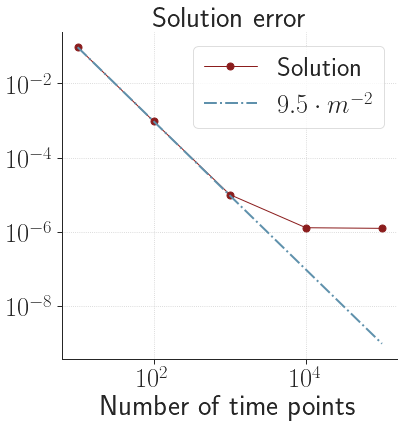

In [17]:
n = N[-1]
x = np.array(M)
y = np.array([SLC.res[name2]['%d-%d'%(m, n)]['err'] for m in M])

# a, b = np.polyfit(1./x**2, y, 1)
a = +9.5E+0
z = a / x**2
s_appr = r'$9.5 \cdot m^{-2}$'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, y, label='Solution', **line_calc)
ax.plot(x, z, label=s_appr, **line_appr)
ax.set_title('Solution error')
ax.set_xlabel('Number of time points')
ax.set_ylabel('')
ax.semilogx()
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.legend(loc='best', frameon=True)

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_e-vs-m.pgf', bbox_inches='tight')

<div class="head2">
    <div class="head2__name">
        Computation time vs number of time points for the 2th order solver
    </div>
</div>

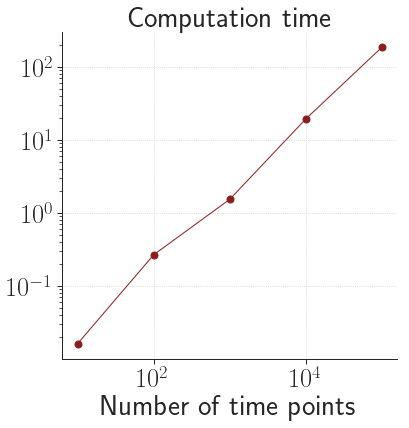

In [18]:
n = N[-1]
x = np.array(M)
y = np.array([SLC.res[name2]['%d-%d'%(m, n)]['t_calc'] for m in M])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, y, label='Solution', **line_calc)
ax.set_title('Computation time')
ax.set_xlabel('Number of time points')
ax.set_ylabel('')
ax.semilogx()
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_t-vs-m.pgf', bbox_inches='tight')

<div class="head2">
    <div class="head2__name">
        Error vs number of spatial points (2th order solver)
    </div>
</div>

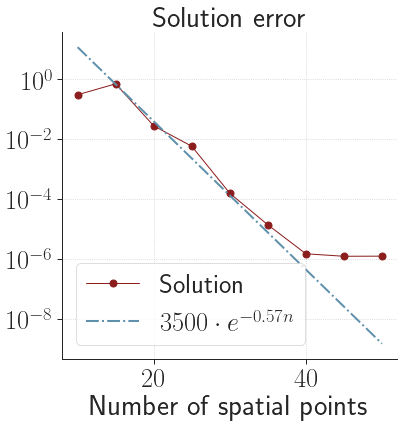

In [19]:
m = M[-1]
x = np.array(N, dtype='float')
y = np.array([SLC.res[name2]['%d-%d'%(m, n)]['err'] for n in N])

# b, a = np.polyfit(x[1:None], np.log(x[1:None]), 1, w=np.sqrt(y[1:None]))
# a = np.exp(a)
# s_appr = '%8.1e * exp[ %9.1e * n ]'%(a, b)

a = +3.5E+3
b = -5.7E-1
z = a * np.exp(b * x)
s_appr = '$3500 \cdot e^{-0.57 n}$'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, y, label='Solution', **line_calc)
ax.plot(x, z, label=s_appr, **line_appr)
ax.set_title('Solution error')
ax.set_xlabel('Number of spatial points')
ax.set_ylabel('')
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.legend(loc='best', frameon=True)

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_e-vs-n.pgf', bbox_inches='tight')

<div class="head2">
    <div class="head2__name">
        Computation time vs number of spatial points for the 2th order solver
    </div>
</div>

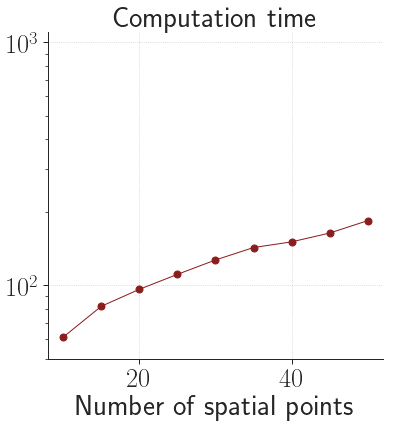

In [20]:
m = M[-1]
x = np.array(N)
y = np.array([SLC.res[name2]['%d-%d'%(m, n)]['t_calc'] for n in N])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, y, label='Solution', **line_calc)
ax.set_ylim(5.0E+1, 1.1E+3)
ax.set_title('Computation time')
ax.set_xlabel('Number of spatial points')
ax.set_ylabel('')
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_t-vs-n.pgf', bbox_inches='tight')

<div class="head2">
    <div class="head2__name">
        Solution in the central spatial point vs time
    </div>
</div>

In [21]:
line_init = {
    'linestyle': '--',
    'linewidth': 3,
    'color': '#48484c',
    'marker': 'o',
    'markersize': 0,
    'markerfacecolor': '#48484c',
    'markeredgewidth': 0,
    'markeredgecolor': '#48484c',
}
line_calc = {
    'linestyle': '-',
    'linewidth': 1,
    'color': '#8b1d1d',
    'marker': 'o',
    'markersize': 7,
    'markerfacecolor': '#8b1d1d',
    'markeredgewidth': 1,
    'markeredgecolor': '#8b1d1d',
}
line_real = {
    'linestyle': '-',
    'linewidth': 3,
    'color': '#485536',
    'marker': 'o',
    'markersize': 0,
    'markerfacecolor': '#485536',
    'markeredgewidth': 0,
    'markeredgecolor': '#485536',
}
line_stat = {
    'linestyle': '-.',
    'linewidth': 2,
    'color': '#5f91ac',
    'marker': 'o',
    'markersize': 0,
    'markerfacecolor': '#5f91ac',
    'markeredgewidth': 0,
    'markeredgecolor': '#5f91ac',
}
line_err_real = {
    'linestyle': '-',
    'linewidth': 2,
    'color': '#485536',
    'marker': 'o',
    'markersize': 6,
    'markerfacecolor': '#8b1d1d',
    'markeredgewidth': 1,
    'markeredgecolor': '#8b1d1d',
}
line_err_stat = {
    'linestyle': '-.',
    'linewidth': 2,
    'color': '#5f91ac',
    'marker': '*',
    'markersize': 6,
    'markerfacecolor': '#5f91ac',
    'markeredgewidth': 1,
    'markeredgecolor': '#5f91ac',
}

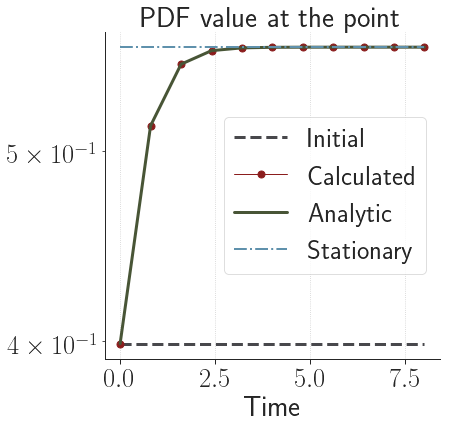

In [22]:
x = np.array([0.])
i = SL._sind(x)
x = SL.X_hst[:, i].reshape(-1, 1)
t = SL.T_hst
v = np.ones(t.shape[0])

r_init = v * SL.func_r0(x)[0]
r_stat = v * SL.func_rs(x)[0]
r_real = np.array([SL.func_rt(x, t_)[0] for t_ in t])
r_calc = np.array([r[i] for r in SL.R_hst])

x = [SL.t_min] + list(t)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, [r_init[0]] + list(r_init), label='Initial', **line_init)
ax.plot(x, [r_init[0]] + list(r_calc), label='Calculated', **line_calc)
ax.plot(x, [r_init[0]] + list(r_real), label='Analytic', **line_real)
ax.plot(x, [r_stat[0]] + list(r_stat), label='Stationary', **line_stat)

ax.set_title('PDF value at the point')
ax.set_xlabel('Time')
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.legend(loc='best', frameon=True)

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_x-zero-vs-t-res.pgf', bbox_inches='tight')

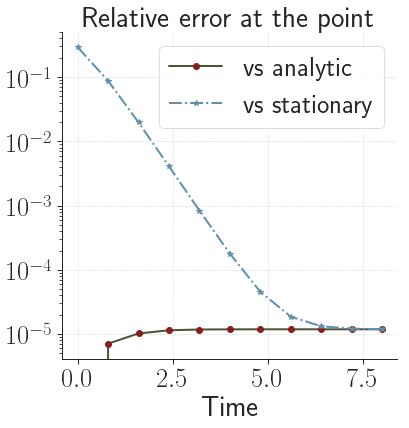

In [23]:
e0 = np.abs(r_stat[0] - r_init[0]) / np.abs(r_stat[0])
e_stat = [e0] + list(np.abs(r_stat - r_calc) / np.abs(r_stat))
e_real = [0.] + list(np.abs(r_real - r_calc) / np.abs(r_real))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, e_real, label='vs analytic', **line_err_real)
ax.plot(x, e_stat, label='vs stationary', **line_err_stat)

ax.set_title('Relative error at the point')
ax.set_xlabel('Time')
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.legend(loc='best', frameon=True)

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_x-zero-vs-t-err.pgf', bbox_inches='tight')

<div class="head2">
    <div class="head2__name">
        Solution at the final time moment
    </div>
</div>

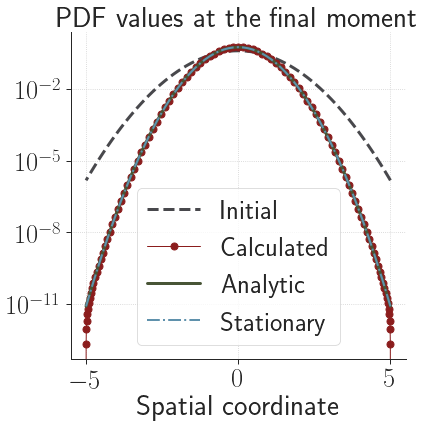

In [24]:
i = -1
t = SL.T_hst[i]
x = SL.X_hst

r_init = SL.func_r0(x)
r_stat = SL.func_rs(x)
r_real = SL.func_rt(x, t)
r_calc = SL.R_hst[i]

x = x.reshape(-1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, r_init, label='Initial', **line_init)
ax.plot(x, r_calc, label='Calculated', **line_calc)
ax.plot(x, r_real, label='Analytic', **line_real)
ax.plot(x, r_stat, label='Stationary', **line_stat)

ax.set_title('PDF values at the final moment')
ax.set_xlabel('Spatial coordinate')
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.legend(loc='best', frameon=True)

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_t-end-vs-x-res.pgf', bbox_inches='tight')

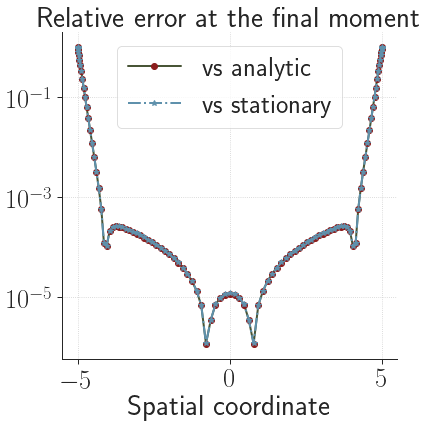

In [25]:
e_real = np.abs(r_real - r_calc) / np.abs(r_real)
e_stat = np.abs(r_stat - r_calc) / np.abs(r_stat)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, e_real, label='vs analytic', **line_err_real)
ax.plot(x, e_stat, label='vs stationary', **line_err_stat)

ax.set_title('Relative error at the final moment')
ax.set_xlabel('Spatial coordinate')
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.legend(loc='best', frameon=True)

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_t-end-vs-x-err.pgf', bbox_inches='tight')

<div class="head1">
    <div class="head1__name">
        Check stationary solution
    </div>
</div>

We calculate rhs (for the large value $\tau$ of time)
$$
    rhs(x)
    =
    \sum_{i=1}^d \sum_{j=1}^d
        \frac{\partial^2}{\partial x_i \partial x_j}
        \left[ D_{ij}(x, \tau) \rho_{stat}(x) \right]
    - \sum_{i=1}^d
        \frac{\partial}{\partial x_i}
        \left[ f_i(x, \tau) \rho_{stat}(x) \right],
$$
using Chebyshev grid and Chebyshev differential matrices ($D_1$, $D_2$)
$$
    \begin{split}
        rhs
        & =
        D_c (D_2 \otimes I \otimes \ldots \otimes I) \rho_{stat} +
        \ldots +
        D_c (I \otimes I \otimes \ldots \otimes D_2) \rho_{stat} -
        \\ & -
        (D_1 \otimes I \otimes \ldots \otimes I) ( f_1 \rho_{stat} ) -
        \ldots -
        (I \otimes I \otimes \ldots \otimes D_1) ( f_d \rho_{stat} ),
    \end{split}
$$
and check if it close to zero.

In [5]:
from intertrain import Intertrain

IT = Intertrain(n=[x_poi], l=[[x_min, x_max]], with_tt=False)
IT.init(func_rs)

I0 = np.eye(x_poi)
J0 = np.eye(x_poi); J0[0, 0] = 0.; J0[-1, -1] = 0.
D1 = IT.dif1()
D2 = IT.dif2()

t = 10.
x = IT.grid()
f = func_f0(x, t)
r = IT.Y.reshape(-1, order='F')

rhs = D_coef * D2 @ r
rhs-= D1 @ (f[0, :] * r)

print('Norm of rho : %-8.2e'%np.linalg.norm(r))
print('Norm of rhs : %-8.2e'%np.linalg.norm(rhs))

Norm of rho : 1.60e+00
Norm of rhs : 2.53e-13
